# Chapter 5 - Support Vector Machines Code Reproduction

In [1]:
# Impor umum
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

# Konfigurasi plot
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Mengabaikan peringatan yang tidak perlu
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Memuat dataset iris
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

# Membuat pipeline SVM
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

# Melatih model
svm_clf.fit(X, y)

# Membuat prediksi
print("Prediksi untuk [5.5, 1.7]:", svm_clf.predict([[5.5, 1.7]]))

Prediksi untuk [5.5, 1.7]: [1.]



Prediksi dengan fitur polinomial: [0]
Prediksi dengan kernel polinomial: [0]
Prediksi dengan kernel RBF: [1]


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


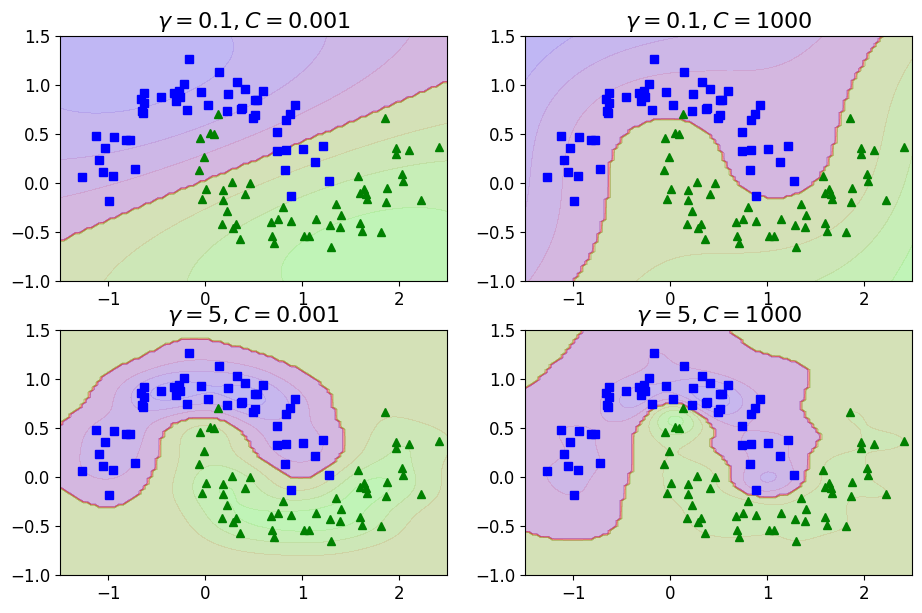

In [3]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Membuat dataset non-linear (make_moons)
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# ### 3.1 Menggunakan Fitur Polinomial
# Membuat pipeline yang menambahkan fitur polinomial lalu melatih SVM linear
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)
print("\nPrediksi dengan fitur polinomial:", polynomial_svm_clf.predict([[1.5, 0.5]]))

# ### 3.2 Menggunakan Kernel Polinomial
from sklearn.svm import SVC

# Melatih SVM dengan kernel polinomial
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)
print("Prediksi dengan kernel polinomial:", poly_kernel_svm_clf.predict([[1.5, 0.5]]))


# ### 3.3 Menggunakan Kernel Gaussian RBF
# Melatih SVM dengan kernel Gaussian RBF
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)
print("Prediksi dengan kernel RBF:", rbf_kernel_svm_clf.predict([[1.5, 0.5]]))


# ### Visualisasi Pengaruh Hyperparameter gamma dan C
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

# Fungsi untuk plot decision boundary (seperti di buku)
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# Plotting hasil
plt.figure(figsize=(11, 7))
for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

plt.show()
# HASIL: Plot ini menunjukkan bagaimana gamma dan C mempengaruhi kompleksitas decision boundary.
# Gamma rendah & C rendah -> model lebih sederhana (regularisasi tinggi)
# Gamma tinggi & C tinggi -> model lebih kompleks (regularisasi rendah), berisiko overfitting.


Prediksi LinearSVR: [8.02279934]
Prediksi SVR Polinomial: [0.32996049]


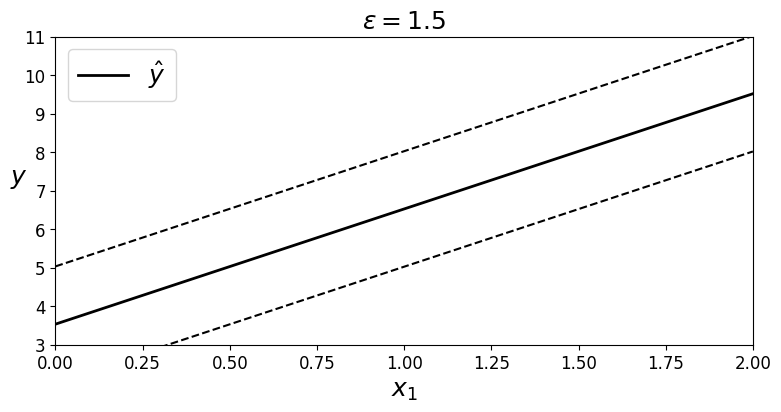

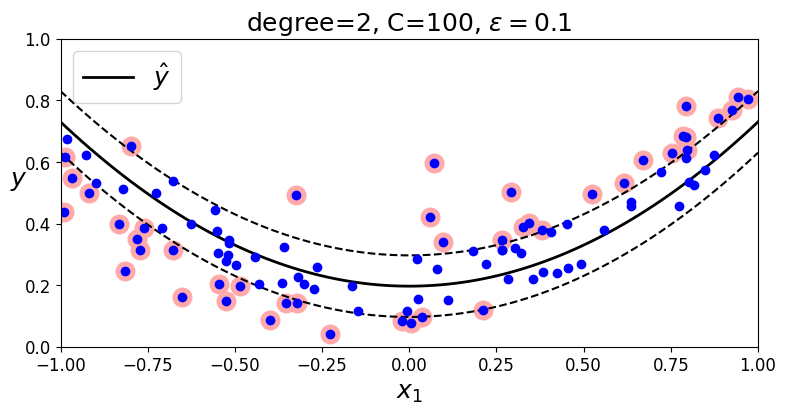

In [5]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

# ### 4.1 Regresi Linear SVM
# Membuat data linear acak
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

# Melatih model LinearSVR
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)
print("\nPrediksi LinearSVR:", svm_reg.predict([[1.5]]))

# ### 4.2 Regresi Non-Linear SVM dengan Kernel Polinomial
# Membuat data non-linear acak
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

# Melatih SVR dengan kernel polinomial
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg.fit(X, y)
print("Prediksi SVR Polinomial:", svm_poly_reg.predict([[0.5]]))


# ### Visualisasi Regresi SVM
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    # Check if the model has the support_ attribute before plotting support vectors
    if hasattr(svm_reg, 'support_'):
        plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

# Plot untuk LinearSVR
plt.figure(figsize=(9, 4))
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.show()
# HASIL: Plot menunjukkan "jalan" (dibatasi garis putus-putus) dengan lebar epsilon.
# Model mencoba memasukkan sebanyak mungkin instance ke dalam jalan.

# Plot untuk SVR Polinomial
plt.figure(figsize=(9, 4))
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(r"degree={}, C={}, $\epsilon = {}$".format(svm_poly_reg.degree, svm_poly_reg.C, svm_poly_reg.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.show()